### Final Draft of ML assignment 1
Advait Rajagopal
N00552598
PhD Economics

### 1. Import specifications and packages

In [1]:
# imports and specifications
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib

#To validate/cross validate--create training and test data
from sklearn.cross_validation import train_test_split

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 2. Performance Measures to evaluate predictive ability

In [2]:
class BinaryClassificationPerformance():
    '''Performance measures to evaluate the fit of a binary classification model'''
    
    def __init__(self, predictions, labels, desc, probabilities=None):
        '''Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y'''
        '''probabilities-optional, probability that Y is equal to True'''
        self.probabilities = probabilities
        self.performance_df = pd.concat([pd.DataFrame(predictions), pd.DataFrame(labels)], axis=1)
        self.performance_df.columns = ['preds', 'labls']
        self.desc = desc
        self.performance_measures = {}
  
    def compute_measures(self):
        '''Compute performance measures defined by Flach p. 57'''
        self.performance_measures['Pos'] = self.performance_df['preds'].sum()
        self.performance_measures['Neg'] = self.performance_df.shape[0] - self.performance_df['preds'].sum()
        self.performance_measures['TP'] = ((self.performance_df['preds'] == True) & (self.performance_df['labls'] == True)).sum()
        self.performance_measures['TN'] = ((self.performance_df['preds'] == False) & (self.performance_df['labls'] == False)).sum()
        self.performance_measures['FP'] = ((self.performance_df['preds'] == True) & (self.performance_df['labls'] == False)).sum()
        self.performance_measures['FN'] = ((self.performance_df['preds'] == False) & (self.performance_df['labls'] == True)).sum()
        self.performance_measures['Accuracy'] = (self.performance_measures['TP'] + self.performance_measures['TN']) / (self.performance_measures['Pos'] + self.performance_measures['Neg'])

### 3. Read in the TEST data set

In [3]:
amazon = pd.read_csv('raw_data_test.csv')
print(amazon.shape)

(91000, 14)


### 4. Redifining 'Helpful'
Here I redefine helpful as at least 3 people had to have found it helpful 

In [4]:
### Only where atleast 3 people have commented

amazon = amazon[amazon['HelpfulnessDenominator'] > 2]

### Creating new helpful (redefining helpful)

amazon['new_helpful'] = (amazon.HelpfulnessNumerator > 3) & (amazon.helpScore >= 1)

###What is the shape now?

print(amazon.shape)

### How many are helpful now

print(amazon['new_helpful'].sum())

(19713, 15)
5652


### 5. Load hashing vectorizer pickle

In [5]:
# from sklearn.feature_extraction.text import HashingVectorizer
# hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
# X_hv = hv.fit_transform(amazon.Text)
# print(X_hv.shape)
# joblib.dump(hv, 'hv.pkl') # pickle

hv = joblib.load('hv.pkl') # pickle
X_hv = hv.transform(amazon.Text)
print(X_hv.shape)

(19713, 131072)


### 6. Load sparse matrix transform pickle

In [6]:
# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer()
# X_tfidf = transformer.fit_transform(X_hv)
# joblib.dump(transformer, 'transformer.pkl') # pickle

transformer = joblib.load('transformer.pkl')
X_tfidf = transformer.transform(X_hv)
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


### 7. Create features other than words

In [7]:
##FEATURE 1 - REVIEW LENGTH
#create a new column called review length which shows the length of each review
amazon['reviewLen'] = amazon['Text'].str.len()
###NOW set all NaN's to 0
amazon.loc[:,'reviewLen'][(np.isnan(amazon['reviewLen']))] = 0
amazon.loc[:'reviewLen'][(np.isnan(amazon['reviewLen']))] = 0
amazon['reviewLen'].describe()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    19713.000000
mean       564.737838
std        602.323115
min         33.000000
25%        221.000000
50%        390.000000
75%        679.000000
max       9296.000000
Name: reviewLen, dtype: float64

In [8]:
##FEATURE 2 - PROFILE FREQUENCY
#Use profile name
prof_name = amazon['ProfileName']
#How many times does an individual user comment
# df_name = pd.DataFrame({'names' : list(prof_name)})
# df_name['freq'] = df_name.groupby('names')['names'].transform('count')
# df_name
amazon['profile_freq'] = amazon.groupby('ProfileName')['ProfileName'].transform('count')
###NOW set all NaN's to 0
amazon.loc[:,'profile_freq'][(np.isnan(amazon['profile_freq']))] = 0
amazon.loc[:'profile_freq'][(np.isnan(amazon['profile_freq']))] = 0
amazon['profile_freq'].describe()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    19713.000000
mean         2.029270
std          2.610466
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         30.000000
Name: profile_freq, dtype: float64

In [9]:
#FEATURE 3 - SUMMARY Length
amazon['summaryLen'] = amazon['Summary'].str.len()
###NOW set all NaN's to 0
where_are_NaNs = np.isnan(amazon['summaryLen'])
amazon.loc[:,'summaryLen'][where_are_NaNs] = 0
amazon.loc[:'summaryLen'][where_are_NaNs] = 0
amazon['summaryLen'].describe()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    19713.000000
mean        25.292294
std         14.779988
min          0.000000
25%         14.000000
50%         22.000000
75%         33.000000
max        127.000000
Name: summaryLen, dtype: float64

In [10]:
#FEATURE 4 - PROFILE LENGTH
amazon['profileLen'] = amazon['ProfileName'].str.len()
###NOW set all NaN's to 0
where_are_NaNs = np.isnan(amazon['profileLen'])
amazon.loc[:,'profileLen'][where_are_NaNs] = 0
amazon.loc[:'profileLen'][where_are_NaNs] = 0
amazon['profileLen'].describe()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    19713.000000
mean        14.614772
std          9.157727
min          0.000000
25%          8.000000
50%         12.000000
75%         19.000000
max         49.000000
Name: profileLen, dtype: float64

In [11]:
#FEATURE 5 - SCORE
#print(type(amazon['Score']))
#amazon.loc[:'Score'][(np.isnan(amazon['Score']))] = 0

In [12]:
#FEATURE 6 - TIME
#print(type(amazon['Time']))
#amazon.loc[:'Time'][(np.isnan(amazon['Time']))] = 0

In [13]:
#FEATURE 7 - Id
#print(type(amazon['Id']))
#amazon.loc[:'Id'][(np.isnan(amazon['Id']))] = 0

In [14]:
#FEATURE 8 - Exclamation points
df1 = pd.DataFrame(amazon['Summary'])
df1.columns = ['summary']
df1['count'] = df1.summary.str.count('!')
amazon['exclam'] = df1['count']
###NOW set all NaN's to 0
amazon.loc[:,'exclam'][(np.isnan(amazon['exclam']))] = 0
amazon.loc[:'exclam'][(np.isnan(amazon['exclam']))] = 0
amazon['exclam'].describe()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    19713.000000
mean         0.345204
std          0.930681
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         34.000000
Name: exclam, dtype: float64

In [15]:
##This is a function that counts the number of uppercase letters in a string
def cap_count(s):
    d = 0
    for c in s:
        if c.isupper():
           d+=1  
        else:
           pass
    #z = d["uppercase"]
    return d

In [16]:
#FEATURE 9 - Count uppercase letters in the SUMMARY
#Here we create a new column that is the number of uppercase in all the summaries

# df2 = pd.DataFrame(amazon['Summary'])
# df2['new'] = df2['Summary'][np.isnan(amazon['summaryLen']) == 0].apply(lambda s : cap_count(s))
amazon['capscount_sum'] = amazon['Summary'][(amazon.Summary != 0)].apply(lambda s : cap_count(s))

In [17]:
###NOW set all NaN's to 0
amazon.loc[:,'capscount_sum'][np.isnan(amazon['capscount_sum'])] = 0
amazon.loc[:'capscount_sum'][np.isnan(amazon['capscount_sum'])] = 0
amazon['capscount_sum'].describe()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


count    19713.000000
mean         2.602851
std          4.193533
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         75.000000
Name: capscount_sum, dtype: float64

In [18]:
#FEATURE 10 - Count uppercase letters in th TEXT (REVIEW)
amazon['capscount_rev'] = amazon['Text'][(amazon.Summary != 0)].apply(lambda s : cap_count(s))

In [19]:
###NOW set all NaN's to 0
amazon.loc[:,'capscount_rev'][(np.isnan(amazon['capscount_rev']))] = 0
amazon.loc[:'capscount_rev'][(np.isnan(amazon['capscount_rev']))] = 0
amazon['capscount_rev'].describe()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


count    19713.000000
mean        17.312890
std         30.767809
min          0.000000
25%          5.000000
50%         10.000000
75%         19.000000
max        718.000000
Name: capscount_rev, dtype: float64

In [20]:
#FEATURE 11 - Score - Profile frequency interaction
amazon['score_count'] = amazon['Score']*amazon['profile_freq']

#FEATURE 12 - Review length - Profile frequency interaction
amazon['revLen_count'] = amazon['reviewLen']*amazon['profile_freq']

#FEATURE 13 - Score - Review length interaction
amazon['score_revLen'] = amazon['Score']*amazon['reviewLen']

#FEATURE 14 - Score - Summary length interaction
amazon['score_sumLen'] = amazon['Score']*amazon['summaryLen']

#FEATURE 15 - Summary length - Profile frequency interaction
amazon['sumLen_count'] = amazon['summaryLen']*amazon['profile_freq']

In [21]:
##Create a Features Matrix (with only the created features)

X_features = amazon[[
                     "reviewLen", 
                     "profile_freq",
                     "summaryLen",
                     "profileLen",
                     "Score",
                     "Time",
                     "Id",
                     "exclam",
                     "capscount_sum",
                     "capscount_rev",
                     "score_count",
                     "revLen_count",
                     "score_revLen",
                     "score_sumLen",
                     "sumLen_count"
                    ]]
print(type(X_features))

<class 'pandas.core.frame.DataFrame'>


In [22]:
#Convert additional features to csr matrix and "stack" with tfidf matrix
from scipy.sparse import csr_matrix, hstack
X_features_csr = csr_matrix(X_features)
X_combined = hstack([X_tfidf, X_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(19713, 131087)


### 8. Load feature scaling pickle

In [23]:
# # feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(with_mean=False)
# X = sc.fit_transform(X_matrix)
# print(X.shape)

# joblib.dump(sc, 'sc.pkl') # pickle
sc = joblib.load('sc.pkl')
X = sc.transform(X_matrix)
print(X.shape)

(19713, 131087)


### 9. Create labels

In [24]:
y = amazon['new_helpful'].values
print(type(y))

<class 'numpy.ndarray'>


### Model fitting

In [25]:
amazon.new_helpful.sum()

5652

In [26]:
# MODEL: Ridge Regression Classifier
# from sklearn import linear_model
# rdg = linear_model.RidgeClassifier()
# rdg.fit(X, y)
# joblib.dump(rdg, 'rdg.pkl') # pickle

rdg = joblib.load('rdg.pkl')

rdg_performance = BinaryClassificationPerformance(rdg.predict(X), y, 'rdg')
rdg_performance.compute_measures()
print(rdg_performance.performance_measures)

{'FP': 2206, 'FN': 2766, 'Accuracy': 0.74778065236138591, 'Neg': 14621, 'TN': 11855, 'Pos': 5092, 'TP': 2886}


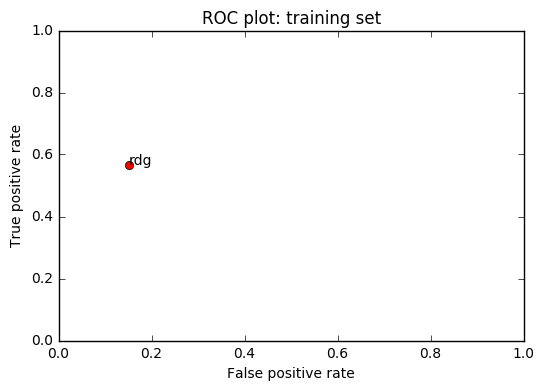

In [27]:
fits = [rdg_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'ro')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()